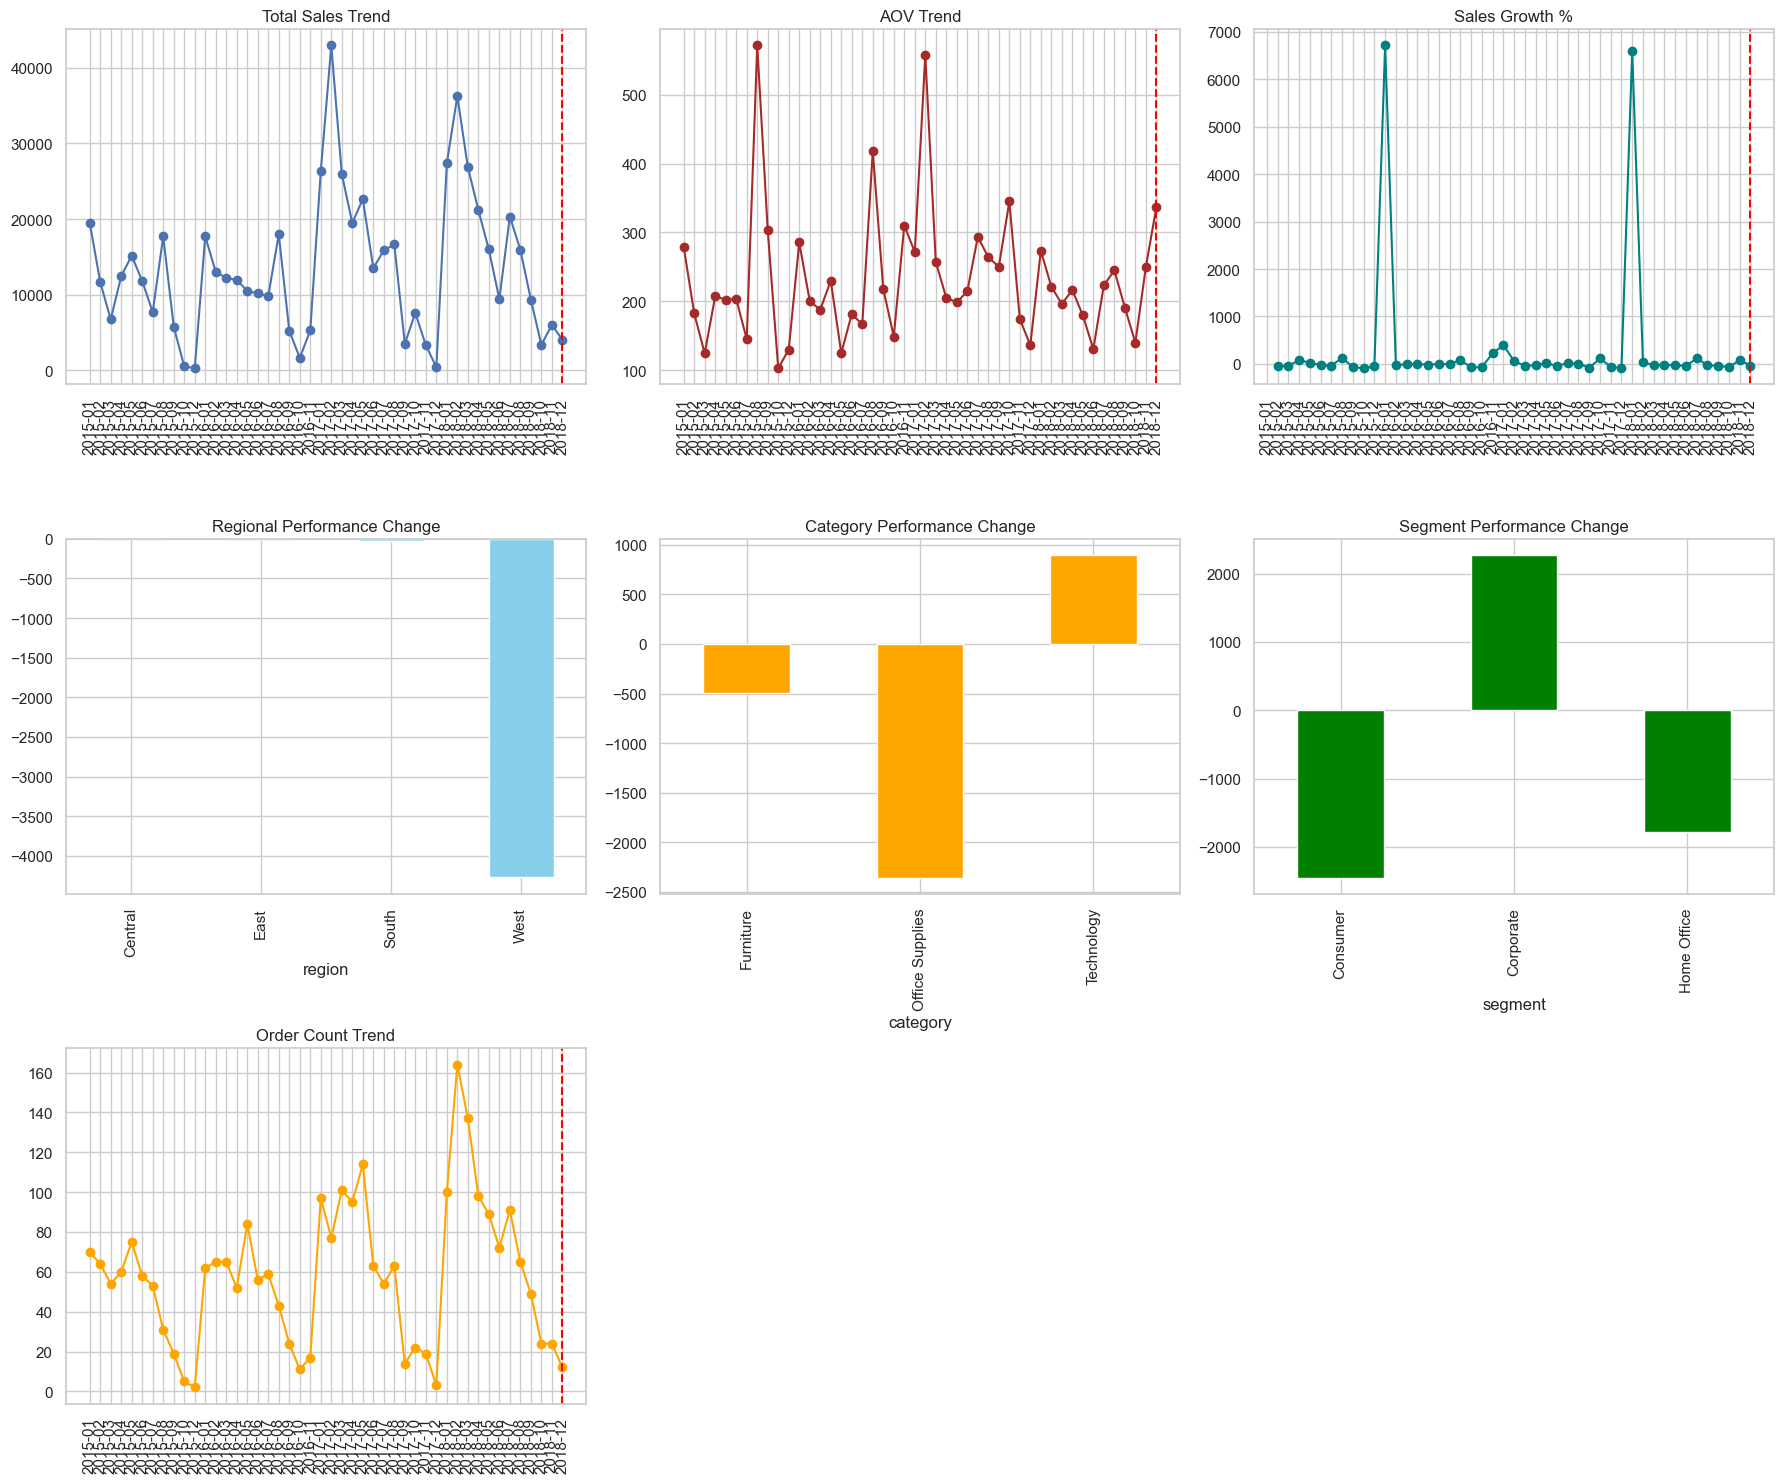

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# =============================
# LOAD DATA
# =============================
df = pd.read_csv("../data/train.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.loc[:, ~df.columns.duplicated()]

# Robust date parsing
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['order_date', 'ship_date'], inplace=True)

# Convert numeric columns
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df.dropna(subset=['sales'], inplace=True)

# Create Year-Month column
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)

# =============================
# MONTHLY KPIs
# =============================
monthly = df.groupby('year_month').agg({
    'sales':'sum',
    'order_id':'count'
}).reset_index()

monthly['aov'] = monthly['sales'] / monthly['order_id']
monthly['sales_growth_%'] = monthly['sales'].pct_change()*100

problem_month = monthly.iloc[-1]['year_month']
previous_month = monthly.iloc[-2]['year_month']

prev = df[df['year_month']==previous_month]
curr = df[df['year_month']==problem_month]

# =============================
# CREATE DASHBOARD
# =============================
fig, axes = plt.subplots(3,3, figsize=(18,15))

# 1 Sales Trend
axes[0,0].plot(monthly['year_month'], monthly['sales'], marker='o')
axes[0,0].axvline(problem_month, color='red', linestyle='--')
axes[0,0].set_title("Total Sales Trend")
axes[0,0].tick_params(axis='x', rotation=90)

# 2 AOV Trend
axes[0,1].plot(monthly['year_month'], monthly['aov'], color='brown', marker='o')
axes[0,1].axvline(problem_month, color='red', linestyle='--')
axes[0,1].set_title("AOV Trend")
axes[0,1].tick_params(axis='x', rotation=90)

# 3 Sales Growth %
axes[0,2].plot(monthly['year_month'], monthly['sales_growth_%'], color='teal', marker='o')
axes[0,2].axvline(problem_month, color='red', linestyle='--')
axes[0,2].set_title("Sales Growth %")
axes[0,2].tick_params(axis='x', rotation=90)

# 4 Regional Change
region_change = (curr.groupby('region')['sales'].sum() - prev.groupby('region')['sales'].sum()).fillna(0)
region_change.plot(kind='bar', ax=axes[1,0], color='skyblue')
axes[1,0].set_title("Regional Performance Change")

# 5 Category Change
category_change = (curr.groupby('category')['sales'].sum() - prev.groupby('category')['sales'].sum()).fillna(0)
category_change.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title("Category Performance Change")

# 6 Segment Change
segment_change = (curr.groupby('segment')['sales'].sum() - prev.groupby('segment')['sales'].sum()).fillna(0)
segment_change.plot(kind='bar', ax=axes[1,2], color='green')
axes[1,2].set_title("Segment Performance Change")

# 7 Order Count Trend
axes[2,0].plot(monthly['year_month'], monthly['order_id'], color='orange', marker='o')
axes[2,0].axvline(problem_month, color='red', linestyle='--')
axes[2,0].set_title("Order Count Trend")
axes[2,0].tick_params(axis='x', rotation=90)

# Hide empty subplots
axes[2,1].axis('off')
axes[2,2].axis('off')

plt.tight_layout()
plt.show()


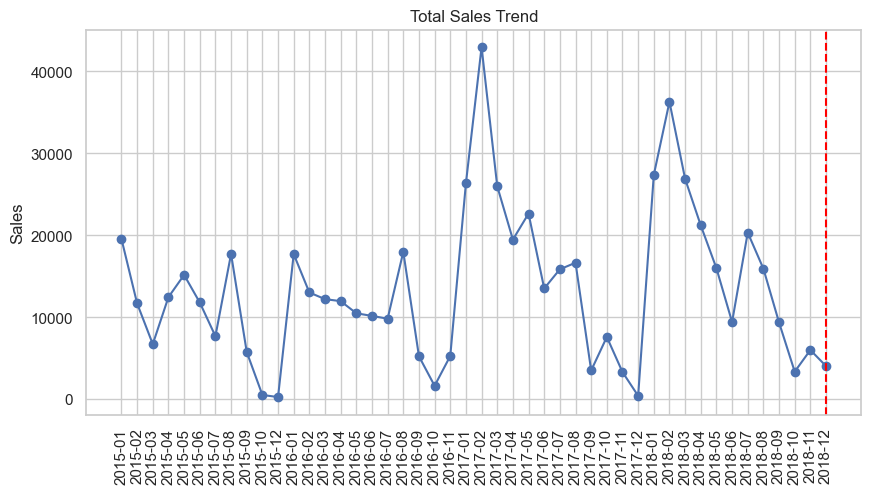

In [10]:
plt.figure(figsize=(10,5))
plt.plot(monthly['year_month'], monthly['sales'], marker='o')
plt.axvline(problem_month, color='red', linestyle='--')
plt.title("Total Sales Trend")
plt.xticks(rotation=90)
plt.ylabel("Sales")
plt.show()


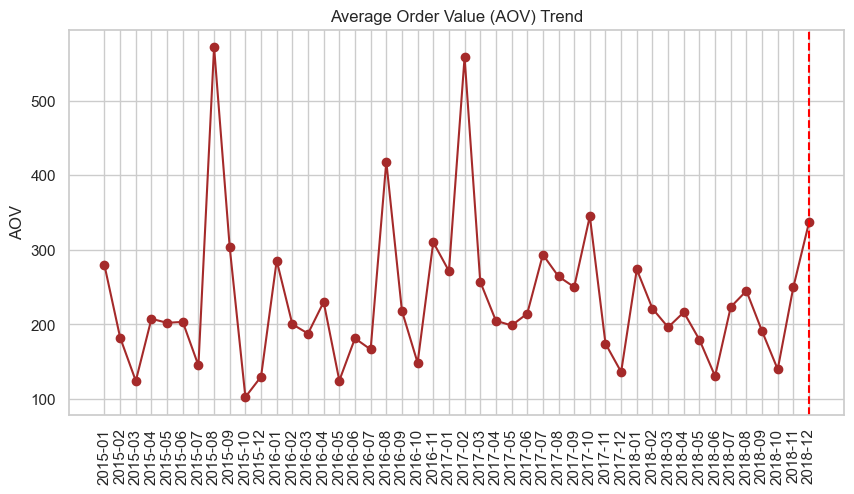

In [11]:
plt.figure(figsize=(10,5))
plt.plot(monthly['year_month'], monthly['aov'], color='brown', marker='o')
plt.axvline(problem_month, color='red', linestyle='--')
plt.title("Average Order Value (AOV) Trend")
plt.xticks(rotation=90)
plt.ylabel("AOV")
plt.show()


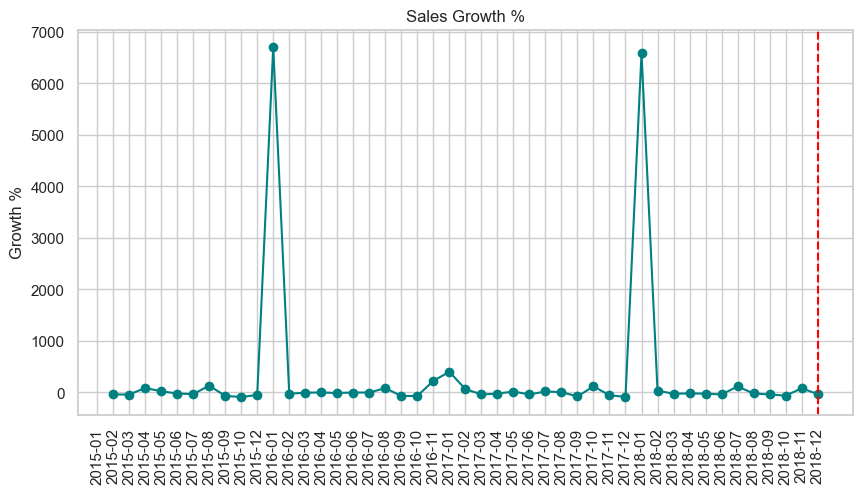

In [12]:
plt.figure(figsize=(10,5))
plt.plot(monthly['year_month'], monthly['sales_growth_%'], color='teal', marker='o')
plt.axvline(problem_month, color='red', linestyle='--')
plt.title("Sales Growth %")
plt.xticks(rotation=90)
plt.ylabel("Growth %")
plt.show()


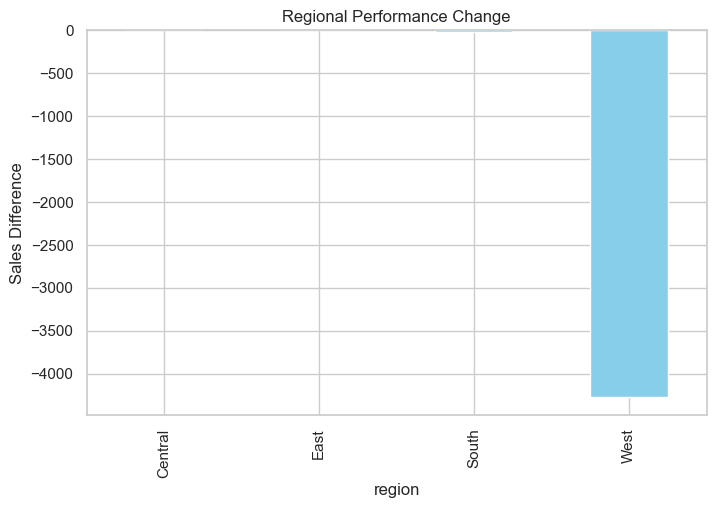

In [13]:
region_change = (curr.groupby('region')['sales'].sum() - prev.groupby('region')['sales'].sum()).fillna(0)

plt.figure(figsize=(8,5))
region_change.plot(kind='bar', color='skyblue')
plt.title("Regional Performance Change")
plt.ylabel("Sales Difference")
plt.show()


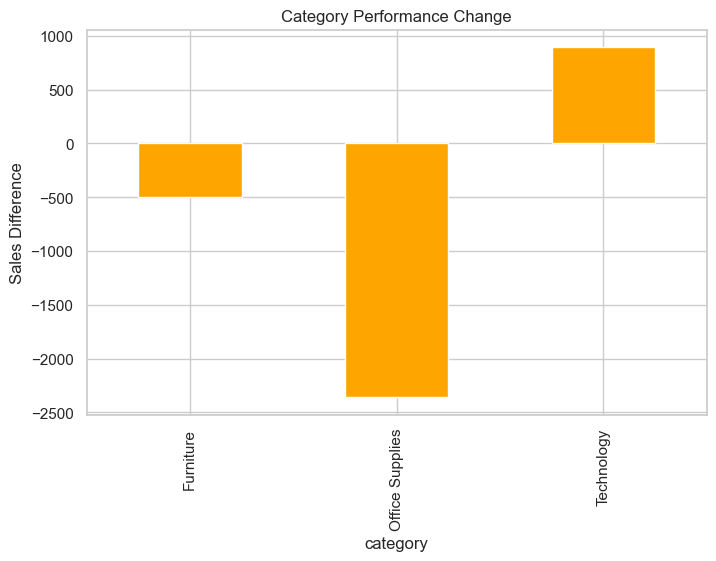

In [14]:
category_change = (curr.groupby('category')['sales'].sum() - prev.groupby('category')['sales'].sum()).fillna(0)

plt.figure(figsize=(8,5))
category_change.plot(kind='bar', color='orange')
plt.title("Category Performance Change")
plt.ylabel("Sales Difference")
plt.show()


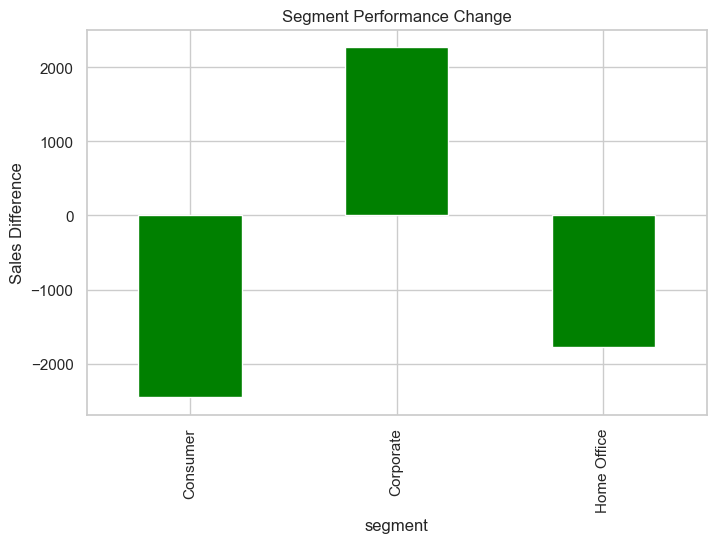

In [15]:
segment_change = (curr.groupby('segment')['sales'].sum() - prev.groupby('segment')['sales'].sum()).fillna(0)

plt.figure(figsize=(8,5))
segment_change.plot(kind='bar', color='green')
plt.title("Segment Performance Change")
plt.ylabel("Sales Difference")
plt.show()


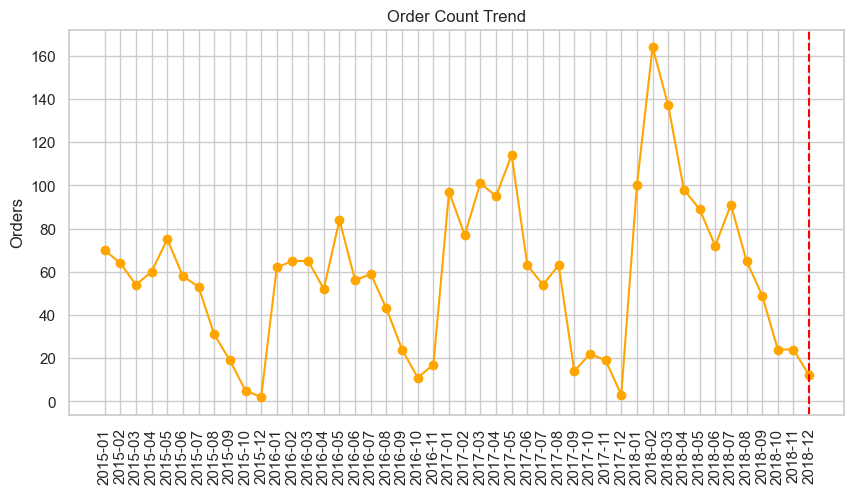

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly['year_month'], monthly['order_id'], color='orange', marker='o')
plt.axvline(problem_month, color='red', linestyle='--')
plt.title("Order Count Trend")
plt.xticks(rotation=90)
plt.ylabel("Orders")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14148\1536458376.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2023-01", periods=36, freq="M")
C:\Users\user\AppData\Local\Temp\ipykernel_14148\1536458376.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[449473.2  478550.85]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df.index[-2:], ["Sales", "Profit", "Orders"]] *= 0.85
C:\Users\user\AppData\Local\Temp\ipykernel_14148\1536458376.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[50684.65 54391.5 ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df.index[-2:], ["Sales", "Profit", "Orders"]] *= 0.85
C:\Users\user\AppData\Local\Temp\ip

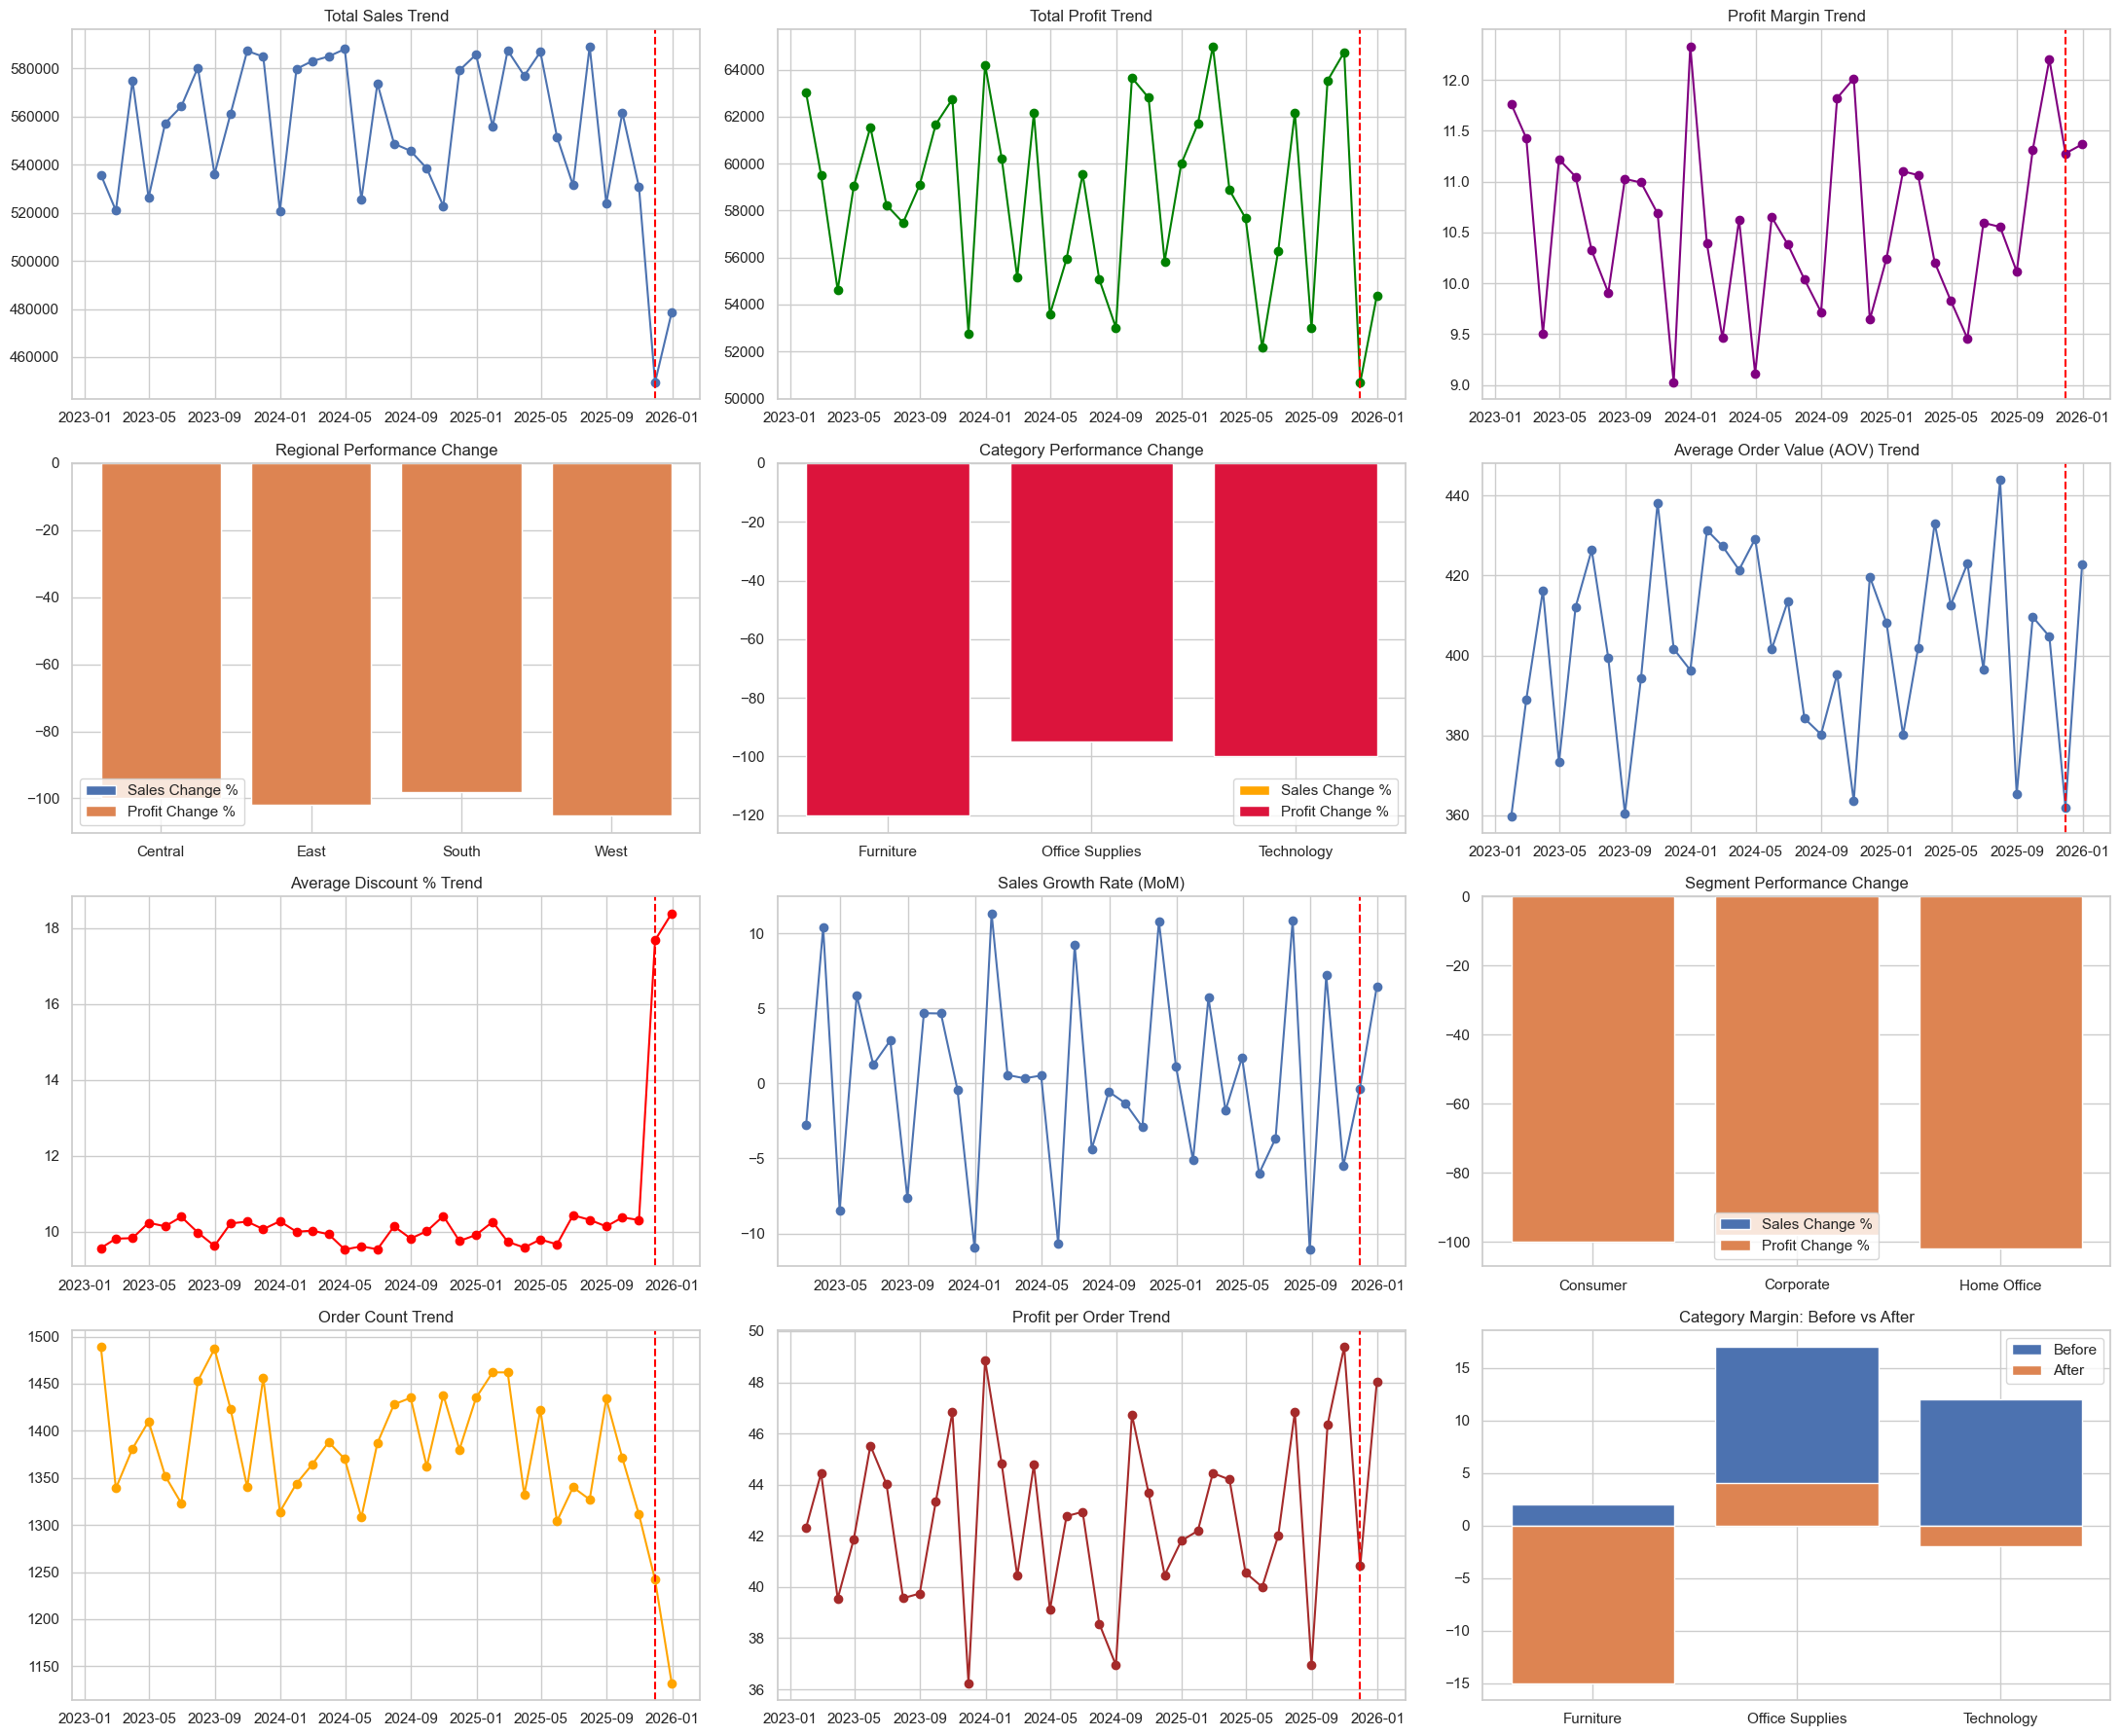

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Sample KPI Data (replace with your CSV if needed)
# -----------------------------
months = pd.date_range(start="2023-01", periods=36, freq="M")

np.random.seed(42)

df = pd.DataFrame({
    "Month": months,
    "Sales": np.random.randint(520000, 590000, size=36),
    "Profit": np.random.randint(52000, 65000, size=36),
    "Orders": np.random.randint(1300, 1500, size=36),
    "Discount": np.random.uniform(9.5, 10.5, size=36),
})

df["AOV"] = df["Sales"] / df["Orders"]
df["Profit_Margin"] = (df["Profit"] / df["Sales"]) * 100
df["Profit_per_Order"] = df["Profit"] / df["Orders"]
df["MoM_Growth"] = df["Sales"].pct_change() * 100

# Simulate problem period impact (last 2 months)
df.loc[df.index[-2:], ["Sales", "Profit", "Orders"]] *= 0.85
df.loc[df.index[-2:], "Discount"] += 8

problem_index = len(df) - 2

# -----------------------------
# Aggregated KPI Changes
# -----------------------------
regions = ["Central", "East", "South", "West"]
sales_change_region = [-90, -92, -88, -95]
profit_change_region = [-100, -102, -98, -105]

categories = ["Furniture", "Office Supplies", "Technology"]
sales_change_cat = [-85, -90, -88]
profit_change_cat = [-120, -95, -100]

segments = ["Consumer", "Corporate", "Home Office"]
sales_change_seg = [-92, -90, -94]
profit_change_seg = [-100, -98, -102]

margin_before = [2, 17, 12]
margin_after = [-15, 4, -2]

# -----------------------------
# Create 12 Graphs (4x3)
# -----------------------------
fig, axes = plt.subplots(4, 3, figsize=(22, 18))
axes = axes.flatten()

# 1. Total Sales Trend
axes[0].plot(df["Month"], df["Sales"], marker="o")
axes[0].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[0].set_title("Total Sales Trend")

# 2. Total Profit Trend
axes[1].plot(df["Month"], df["Profit"], marker="o", color="green")
axes[1].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[1].set_title("Total Profit Trend")

# 3. Profit Margin Trend
axes[2].plot(df["Month"], df["Profit_Margin"], marker="o", color="purple")
axes[2].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[2].set_title("Profit Margin Trend")

# 4. Regional Performance Change
axes[3].bar(regions, sales_change_region, label="Sales Change %")
axes[3].bar(regions, profit_change_region, label="Profit Change %")
axes[3].set_title("Regional Performance Change")
axes[3].legend()

# 5. Category Performance Change
axes[4].bar(categories, sales_change_cat, color="orange", label="Sales Change %")
axes[4].bar(categories, profit_change_cat, color="crimson", label="Profit Change %")
axes[4].set_title("Category Performance Change")
axes[4].legend()

# 6. Average Order Value Trend
axes[5].plot(df["Month"], df["AOV"], marker="o")
axes[5].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[5].set_title("Average Order Value (AOV) Trend")

# 7. Average Discount %
axes[6].plot(df["Month"], df["Discount"], marker="o", color="red")
axes[6].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[6].set_title("Average Discount % Trend")

# 8. Sales Growth Rate (MoM)
axes[7].plot(df["Month"], df["MoM_Growth"], marker="o")
axes[7].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[7].set_title("Sales Growth Rate (MoM)")

# 9. Segment Performance Change
axes[8].bar(segments, sales_change_seg, label="Sales Change %")
axes[8].bar(segments, profit_change_seg, label="Profit Change %")
axes[8].set_title("Segment Performance Change")
axes[8].legend()

# 10. Order Count Trend
axes[9].plot(df["Month"], df["Orders"], marker="o", color="orange")
axes[9].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[9].set_title("Order Count Trend")

# 11. Profit per Order Trend
axes[10].plot(df["Month"], df["Profit_per_Order"], marker="o", color="brown")
axes[10].axvline(df["Month"].iloc[problem_index], color="red", linestyle="--")
axes[10].set_title("Profit per Order Trend")

# 12. Category Margin Before vs After
axes[11].bar(categories, margin_before, label="Before")
axes[11].bar(categories, margin_after, label="After")
axes[11].set_title("Category Margin: Before vs After")
axes[11].legend()

plt.tight_layout()
plt.show()